In [1]:
import numpy as np # type: ignore
import pandas as pd
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt

In [2]:
import csv
import random
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...


In [3]:
import pandas as pd

dataset = pd.read_csv('tweet - Sheet1.csv')


In [4]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
data=[]
for i in range(0,4000):
  tweet = re.sub('[^a-zA-Z]', ' ', dataset['Tweet'][i])
  tweet=tweet.lower()
  tweet=tweet.split()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  tweet = [word for word in tweet if not word in set(all_stopwords)]
  tweet=' '.join(tweet)
  data.append(tweet)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
dates = dataset['Dates'].tolist()[:4000]

In [6]:
df = pd.DataFrame({ 'Dates':dates,'Modified_Tweets': data})

In [7]:
print(df)

           Dates                                    Modified_Tweets
0     2022-09-29  mainstream media done amazing job brainwashing...
1     2022-09-29    tesla delivery estimates around k analysts tsla
2     2022-09-29  even include unvested rsus additional equity n...
3     2022-09-29  realdanodowd wholemarsblog tesla hahaha still ...
4     2022-09-29  realdanodowd tesla stop trying kill kids sad d...
...          ...                                                ...
3995  2022-08-10  someone get tsla superfan omar review meme tha...
3996  2022-08-10  ceo genius ceo tells everything peachy ceo sel...
3997  2022-08-10  destroyed realdanodowd part many asked child r...
3998  2022-08-10  tsla intraday high elonmusk b sale simulation ...
3999  2022-08-10  imagine outrage short said inverse things la t...

[4000 rows x 2 columns]


In [8]:
ndata=pd.DataFrame(columns=['Date','Tweets'])

In [9]:
tweet=""
for i in range(0,len(df)-1):
    date=df.Dates.iloc[i]  #checks two dates and combines them if same.
    next_date=df.Dates.iloc[i+1]
    if(str(date)==str(next_date)):
        tweet=tweet+df.Modified_Tweets.iloc[i]+" "
    if(str(date)!=str(next_date)):
        temp_df = pd.DataFrame([[date,
                                tweet]], columns = ['Date','Tweets']) #temp dataset to store values of dates and tweets.
        ndata = pd.concat([ndata, temp_df], axis = 0).reset_index(drop = True)
        tweet=" "

In [10]:
print(ndata)

          Date                                             Tweets
0   2022-09-29  mainstream media done amazing job brainwashing...
1          NaN                                                   
2   2022-09-28   fyi illinois running ev rebate new used evs p...
3          NaN                                                   
4   2022-09-27   tesla needs fix negative camber issue model b...
5   2022-09-26   tsla since legacy auto made sinking unit sale...
6   2022-09-25   reuters reports tesla plans construct battery...
7   2022-09-24   saw highway today guess elonmusk really goat ...
8   2022-09-23   bears week spy qqq tsla https co hf elwgl wow...
9   2022-09-22   tsla shares increased value basis points per ...
10  2022-09-21   mate working lights tsla ai day optimus bot u...
11  2022-09-20   autonomous car companies rapidly expanding le...
12  2022-09-19   thank missjilianne making feel like star beve...
13  2022-09-18   spy analysis back week thoughts spy expect pr...
14  2022-0

In [11]:
readd=pd.read_csv('closing price  - Sheet1 (1).csv')
print(readd)

          Date        Open        High         Low       Close   Adj Close  \
0   2022-08-11  296.513336  298.236664  285.833344  286.630005  286.630005   
1   2022-08-12  289.416656  300.160004  285.033325  300.029999  300.029999   
2   2022-08-15  301.786682  313.133331  301.230011  309.320007  309.320007   
3   2022-08-16  311.666656  314.666656  302.883331  306.563324  306.563324   
4   2022-08-17  303.396667  309.656677  300.033325  303.996674  303.996674   
5   2022-08-18  306.000000  306.500000  301.853333  302.869995  302.869995   
6   2022-08-19  299.000000  300.359985  292.500000  296.666656  296.666656   
7   2022-08-22  291.913330  292.399994  286.296661  289.913330  289.913330   
8   2022-08-23  291.453339  298.826660  287.923340  296.453339  296.453339   
9   2022-08-24  297.563324  303.646667  296.500000  297.096680  297.096680   
10  2022-08-25  302.359985  302.959992  291.600006  296.070007  296.070007   
11  2022-08-26  297.429993  302.000000  287.470001  288.089996  

In [12]:
#Adding a new columnn to the dataset for stock prices.
ndata['Prices']=""

In [13]:
indx=0
for i in range (0,len(ndata)):
    for j in range (0,len(readd)):
        get_tweet_date=ndata.Date.iloc[i]
        get_stock_date=readd.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            ndata['Prices'].iloc[i] = int(readd.Close[j])

In [14]:
print(ndata)

          Date                                             Tweets Prices
0   2022-09-29  mainstream media done amazing job brainwashing...    268
1          NaN                                                          
2   2022-09-28   fyi illinois running ev rebate new used evs p...    287
3          NaN                                                          
4   2022-09-27   tesla needs fix negative camber issue model b...    282
5   2022-09-26   tsla since legacy auto made sinking unit sale...    276
6   2022-09-25   reuters reports tesla plans construct battery...       
7   2022-09-24   saw highway today guess elonmusk really goat ...       
8   2022-09-23   bears week spy qqq tsla https co hf elwgl wow...    275
9   2022-09-22   tsla shares increased value basis points per ...    288
10  2022-09-21   mate working lights tsla ai day optimus bot u...    300
11  2022-09-20   autonomous car companies rapidly expanding le...    308
12  2022-09-19   thank missjilianne making feel lik

In [15]:
#from tkinter.constants import N
mean=0
summ=0
count=0
for i in range(0,len(ndata)):
    if(ndata.Prices.iloc[i]!=""):
        summ=summ+int(ndata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ndata)):
    if(ndata.Prices.iloc[i]==""):
        ndata.Prices.iloc[i]=int(mean)

In [16]:
print(ndata)

          Date                                             Tweets Prices
0   2022-09-29  mainstream media done amazing job brainwashing...    268
1          NaN                                                       291
2   2022-09-28   fyi illinois running ev rebate new used evs p...    287
3          NaN                                                       291
4   2022-09-27   tesla needs fix negative camber issue model b...    282
5   2022-09-26   tsla since legacy auto made sinking unit sale...    276
6   2022-09-25   reuters reports tesla plans construct battery...    291
7   2022-09-24   saw highway today guess elonmusk really goat ...    291
8   2022-09-23   bears week spy qqq tsla https co hf elwgl wow...    275
9   2022-09-22   tsla shares increased value basis points per ...    288
10  2022-09-21   mate working lights tsla ai day optimus bot u...    300
11  2022-09-20   autonomous car companies rapidly expanding le...    308
12  2022-09-19   thank missjilianne making feel lik

In [17]:
ndata["Compound"] = ''
ndata["Negative"] = ''
ndata["Neutral"] = ''
ndata["Positive"] = ''
ndata

,Date,Tweets,Prices,Compound,Negative,Neutral,Positive
0,2022-09-29,mainstream media done amazing job brainwashing...,268,,,,
1,NaN,,291,,,,
2,2022-09-28,fyi illinois running ev rebate new used evs p...,287,,,,
3,NaN,,291,,,,
4,2022-09-27,tesla needs fix negative camber issue model b...,282,,,,
5,2022-09-26,tsla since legacy auto made sinking unit sale...,276,,,,
6,2022-09-25,reuters reports tesla plans construct battery...,291,,,,
7,2022-09-24,saw highway today guess elonmusk really goat ...,291,,,,
8,2022-09-23,bears week spy qqq tsla https co hf elwgl wow...,275,,,,
9,2022-09-22,tsla shares increased value basis points per ...,288,,,,


In [18]:
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ndata.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', ndata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ndata['Compound'].iloc[indexx] = sentence_sentiment['compound']
        ndata['Negative'].iloc[indexx] = sentence_sentiment['neg']
        ndata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        ndata['Positive'].iloc[indexx] = sentence_sentiment['compound']
    except TypeError:
        print (ndata.loc[indexx, 'Tweets'])
        print (indexx)

In [19]:
print(ndata)

          Date                                             Tweets Prices  \
0   2022-09-29  mainstream media done amazing job brainwashing...    268   
1          NaN                                                       291   
2   2022-09-28   fyi illinois running ev rebate new used evs p...    287   
3          NaN                                                       291   
4   2022-09-27   tesla needs fix negative camber issue model b...    282   
5   2022-09-26   tsla since legacy auto made sinking unit sale...    276   
6   2022-09-25   reuters reports tesla plans construct battery...    291   
7   2022-09-24   saw highway today guess elonmusk really goat ...    291   
8   2022-09-23   bears week spy qqq tsla https co hf elwgl wow...    275   
9   2022-09-22   tsla shares increased value basis points per ...    288   
10  2022-09-21   mate working lights tsla ai day optimus bot u...    300   
11  2022-09-20   autonomous car companies rapidly expanding le...    308   
12  2022-09-

% of positive tweets =  94.33962264150944
% of negative tweets =  0.0
% of neutral tweets =  5.660377358490567


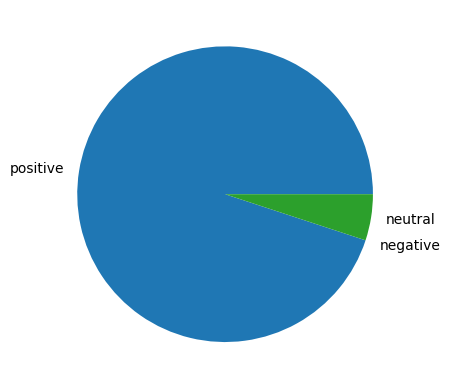

In [20]:
posi = 0
nega = 0
neutral = 0

for i in range(0, len(ndata)):
    get_val = ndata.Compound[i]
    if float(get_val) < 0:
        nega += 1
    elif float(get_val) > 0:
        posi += 1
    else:
        neutral += 1

total_tweets = len(ndata)
posper = (posi / total_tweets) * 100
negper = (nega / total_tweets) * 100
neuper = (neutral / total_tweets) * 100

print("% of positive tweets = ", posper)
print("% of negative tweets = ", negper)
print("% of neutral tweets = ", neuper)

import matplotlib.pyplot as plt

arr = np.asarray([posper, negper, neuper], dtype=int)
plt.pie(arr, labels=['positive', 'negative', 'neutral'])
plt.show()

In [21]:
newdf=ndata[['Date','Prices','Compound','Negative','Neutral','Positive']].copy()
newdf

,Date,Prices,Compound,Negative,Neutral,Positive
0,2022-09-29,268,0.9932,0.117,0.743,0.9932
1,NaN,291,0.0,0.0,0.0,0.0
2,2022-09-28,287,0.9976,0.093,0.757,0.9976
3,NaN,291,0.0,0.0,0.0,0.0
4,2022-09-27,282,0.9983,0.073,0.794,0.9983
5,2022-09-26,276,0.9989,0.09,0.745,0.9989
6,2022-09-25,291,0.9941,0.094,0.748,0.9941
7,2022-09-24,291,0.9986,0.067,0.744,0.9986
8,2022-09-23,275,0.999,0.084,0.753,0.999
9,2022-09-22,288,0.9988,0.096,0.742,0.9988


In [22]:
train_starting_index = '0'
train_last_index = '46'
test_starting_index = '47'
test_last_index = '52'
train = newdf.loc[train_starting_index : train_last_index,:]
test = newdf.loc[test_starting_index:test_last_index,:]

In [23]:
sentiment_list= []
for date, row in train.iterrows():
    sentiment_score = np.asarray([newdf.loc[date, 'Negative'],newdf.loc[date, 'Positive']])
    sentiment_list.append(sentiment_score)
df_train = np.asarray(sentiment_list)
print(df_train)

[[0.117  0.9932]
 [0.     0.    ]
 [0.093  0.9976]
 [0.     0.    ]
 [0.073  0.9983]
 [0.09   0.9989]
 [0.094  0.9941]
 [0.067  0.9986]
 [0.084  0.999 ]
 [0.096  0.9988]
 [0.068  0.9945]
 [0.098  0.9933]
 [0.069  0.9991]
 [0.063  0.9966]
 [0.069  0.9981]
 [0.046  0.9996]
 [0.085  0.9994]
 [0.073  0.9993]
 [0.053  0.999 ]
 [0.063  0.9981]
 [0.058  0.9991]
 [0.097  0.9914]
 [0.054  0.9994]
 [0.073  0.9991]
 [0.083  0.9991]
 [0.     0.    ]
 [0.085  0.9979]
 [0.074  0.9878]
 [0.059  0.9976]
 [0.039  0.9994]
 [0.063  0.9996]
 [0.078  0.9985]
 [0.069  0.9992]
 [0.066  0.9992]
 [0.066  0.9994]
 [0.078  0.9992]
 [0.067  0.999 ]
 [0.074  0.9992]
 [0.081  0.9996]
 [0.079  0.9993]
 [0.089  0.9989]
 [0.058  0.9997]
 [0.04   0.9995]
 [0.088  0.9925]
 [0.036  0.9996]
 [0.067  0.9994]
 [0.097  0.997 ]]


In [24]:
sentiment_score_list = []
for date, row in test.iterrows():
    sentiment_score = np.asarray([newdf.loc[date, 'Negative'],newdf.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
df_test = np.asarray(sentiment_score_list)
print(df_test)

[[0.055  0.999 ]
 [0.084  0.9994]
 [0.077  0.9989]
 [0.059  0.9974]
 [0.075  0.9989]
 [0.107  0.9992]]


In [25]:
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])
print(y_train)

   Prices
0     268
1     291
2     287
3     291
4     282
5     276
6     291
7     291
8     275
9     288
10    300
11    308
12    309
13    291
14    291
15    303
16    303
17    302
18    292
19    304
20    291
21    291
22    299
23    289
24    283
25    291
26    274
27    291
28    291
29    291
30    270
31    277
32    275
33    277
34    284
35    291
36    291
37    288
38    296
39    297
40    296
41    289
42    291
43    291
44    296
45    302
46    303


In [30]:
!pip install scikit-learn


     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ------------- -------------------------- 20.5/59.0 kB ? eta -:--:--
     -------------------------------- ----- 51.2/59.0 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 59.0/59.0 kB 518.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.3 MB 2.6 MB/s eta 0:00:04
   - -------------------------------------- 0.3/9.3 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.3 MB 6.9 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.3 MB 9.6 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.3 MB 12.8 MB/s eta 0:00:01
   ----------------------- ---------------- 5.3/9.3 MB 19.0 MB/s eta 0:00:01
   -------------------------- ------------- 6.1/9.3 MB 19.6 MB/s eta 0:00:01
   ------------------------------- -------- 7.2/9.3 MB 19.3 MB/s eta 0:00:01
   -----------

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
rf = RandomForestRegressor()
rf.fit(df_train, y_train)
prediction = rf.predict(df_test)
print(prediction)

c:\Users\KIIT\anaconda3\envs\textS\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[291.96 297.64 285.09 292.16 287.89 296.81]


In [33]:
idx= np.arange(int(test_starting_index),int(test_last_index)+1)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [34]:
predictions_df_

,Prices
47,291.96
48,297.64
49,285.09
50,292.16
51,287.89
52,296.81


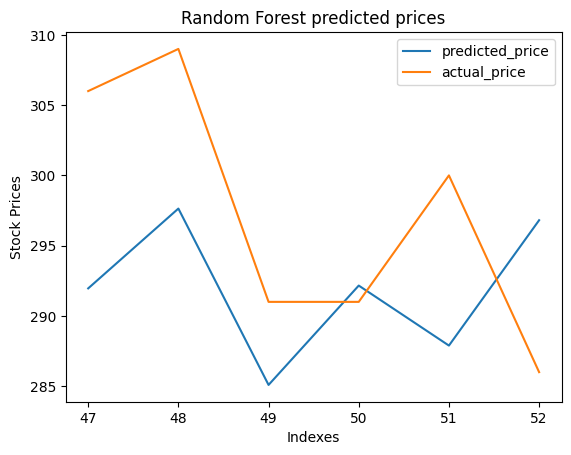

In [35]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")